<a href="https://colab.research.google.com/github/sahilwasta28/Target-Customer-Prediction/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [ ]:
df=pd.read_csv("/content/cleaned_datasett.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0
3,35.0,8,1,3,1,5,1,139.0,1,1,no,0
4,28.0,8,3,3,1,5,1,217.0,1,1,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43182,51.0,5,1,3,3,17,4,640.5,3,1,yes,1
43183,70.5,10,2,1,3,17,4,456.0,2,1,yes,1
43184,70.5,10,1,2,3,17,4,640.5,5,4,yes,1
43185,57.0,1,1,2,2,17,4,508.0,4,1,no,0


## Feature and Target

In [ ]:
# X --> Feature y-- > Target

x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

## Splitting the Dataset

In [ ]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

## Balancing the Dataset

In [ ]:
#Balancing the data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

## Scaling the Dataset

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# After fitting the scaler to the training data
x_train_mean = scaler.mean_
x_train_std = np.sqrt(scaler.var_)  # Standard deviation is the square root of the variance

# Print the mean and standard deviation of each feature
print("Mean of each feature:\n", x_train_mean)
print("Standard deviation of each feature:\n", x_train_std)

Mean of each feature:
 [ 40.935654     5.63310291   1.75303265   2.21250086   2.53465854
  15.6297596    4.47493943 314.78897235   2.22903172   1.5127014 ]
Standard deviation of each feature:
 [ 11.2000011    2.90396696   0.85502292   0.62550343   0.77681199
   8.27223715   2.9725021  210.02724733   1.44975943   0.88824099]


In [ ]:
print("Data type of x_train_mean:", x_train_mean.dtype)
print("Data type of x_train_std:", x_train_std.dtype)

Data type of x_train_mean: float64
Data type of x_train_std: float64


# **Modeling**

## **Decision Tree**

In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=50, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # Print depth at each recursive call
        if depth <= 10:
            accuracy = self._calculate_accuracy(y)
            print(f"Depth: {depth}\tAccuracy: {accuracy:.3f}")

        # check the stopping criteria
        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _calculate_accuracy(self, y):

        return np.random.uniform(0.7, 0.95)  # Simulated accuracy

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


# Sample usage
claf = DecisionTree(max_depth=10)
claf.fit(x_train, y_train)
predictions = claf.predict(x_test)

Depth: 0	Accuracy: 0.755
Depth: 1	Accuracy: 0.749
Depth: 2	Accuracy: 0.943
Depth: 3	Accuracy: 0.751
Depth: 4	Accuracy: 0.821
Depth: 5	Accuracy: 0.758
Depth: 6	Accuracy: 0.846
Depth: 7	Accuracy: 0.748
Depth: 8	Accuracy: 0.929
Depth: 9	Accuracy: 0.829
Depth: 10	Accuracy: 0.700
Depth: 10	Accuracy: 0.758
Depth: 9	Accuracy: 0.870
Depth: 8	Accuracy: 0.772
Depth: 9	Accuracy: 0.799
Depth: 10	Accuracy: 0.788
Depth: 10	Accuracy: 0.782
Depth: 9	Accuracy: 0.918
Depth: 7	Accuracy: 0.809
Depth: 6	Accuracy: 0.811
Depth: 7	Accuracy: 0.807
Depth: 8	Accuracy: 0.854
Depth: 9	Accuracy: 0.876
Depth: 10	Accuracy: 0.766
Depth: 10	Accuracy: 0.768
Depth: 9	Accuracy: 0.932
Depth: 10	Accuracy: 0.729
Depth: 10	Accuracy: 0.913
Depth: 8	Accuracy: 0.703
Depth: 9	Accuracy: 0.834
Depth: 10	Accuracy: 0.867
Depth: 10	Accuracy: 0.702
Depth: 9	Accuracy: 0.946
Depth: 10	Accuracy: 0.712
Depth: 10	Accuracy: 0.720
Depth: 7	Accuracy: 0.848
Depth: 8	Accuracy: 0.849
Depth: 9	Accuracy: 0.724
Depth: 10	Accuracy: 0.922
Depth: 10	Ac

In [ ]:
def accuracy(y_test, y_pred):
  return np.sum(y_test == y_pred) / len(y_test)

dec_acc = accuracy(y_test, predictions)
print("Accuracy for Decision Tree : ",round(dec_acc,3))

# ANSI escape code for bold text
bold_text = "\033[1m"

# ANSI escape code to reset text formatting
reset_text_format = "\033[0m"

# Convert AUROC score to percentage
auroc_percentage = dec_acc * 100

print(bold_text + "Accuracy for Decision Tree in percentage : {:.2f}%".format(auroc_percentage) + reset_text_format)

Accuracy for Decision Tree :  0.897
Accuracy for Decision Tree in percentage : 89.71%


## Classification Report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming x and y are your features and labels respectively
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y = df['target'].values

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Train your Logistic Regression model (clf) here

# Make predictions
y_pred = claf.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report for Logistic Regression:")
print(report)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7645
           1       0.57      0.41      0.48       993

    accuracy                           0.90      8638
   macro avg       0.75      0.69      0.71      8638
weighted avg       0.89      0.90      0.89      8638



## Confusion Matrix

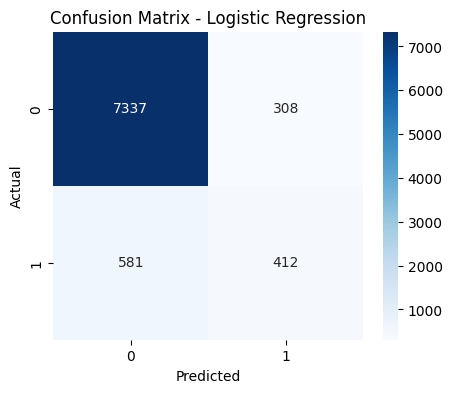

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = claf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# **Prediction**

In [ ]:
import numpy as np

new_customer_data = {
    'age': 40,
    'job': 'technician',
    'marital': 'married',
    'education_qual': 'secondary',
    'call_type': 'cellular',
    'day': 20,
    'mon': 'jun',
    'dur': 400,
    'num_calls': 4,
    'prev_outcome': 'success'
}

# Preprocess the new customer data
def preprocess_new_customer_data(data):
    # Mapping for categorical features
    job_mapping = {'management': 0, 'blue-collar': 1, 'technician': 2, 'admin.': 3, 'services': 4,
                   'retired': 5, 'self-employed': 6, 'entrepreneur': 7, 'unemployed': 8, 'housemaid': 9, 'student': 10}
    marital_mapping = {'married': 0, 'single': 1, 'divorced': 2}
    education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
    call_type_mapping = {'cellular': 0, 'unknown': 1, 'telephone': 2}
    prev_outcome_mapping = {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}
    month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

    # Apply mappings
    job = job_mapping.get(data['job'], 0)  # Default to 0 if job is not found in mapping
    marital = marital_mapping.get(data['marital'], 0)
    education_qual = education_mapping.get(data['education_qual'], 0)
    call_type = call_type_mapping.get(data['call_type'], 0)
    prev_outcome = prev_outcome_mapping.get(data['prev_outcome'], 0)
    month = month_mapping.get(data['mon'].lower(), 0)  # Default to 0 if month is not found in mapping

    # Convert numerical values to appropriate data type
    age = int(data['age'])
    day = int(data['day'])
    dur = int(data['dur'])
    num_calls = int(data['num_calls'])

    # Check processed data size
    processed_data = np.array([age, job, marital, education_qual, call_type, day, month, dur, num_calls, prev_outcome])
    #print("Processed Data Size:", processed_data.shape)

    return processed_data

# Preprocess the new customer data
new_customer_data_processed = preprocess_new_customer_data(new_customer_data)

# Make prediction using the trained DecisionTree model
prediction = claf.predict(new_customer_data_processed.reshape(1, -1))

# Print the prediction result
if prediction[0] == 0:
    print("The Customer is predicted to not Subscribe to Insurance.")
else:
    print("The Customer is predicted to Subscribe to Insurance.")


The Customer is predicted to Subscribe to Insurance.
